In [2]:
import os
import sys
import numpy as np

In [3]:
from skimage import data, io, filters
import matplotlib.pyplot as plt

In [4]:
# dimensions of result image
W = 1200
H = 900
CHANNEL_NUM = 3  # we work with rgb images
MAX_VALUE = 255  # max pixel value, required by ppm header

In [5]:
def read_image(path):
    # second line of header contains image dimensions
    w, h = np.loadtxt(path, skiprows=1, max_rows=1, dtype=np.int32)
    # skip 3 lines reserved for header and read image
    image = np.loadtxt(path, skiprows=3, dtype=np.uint8).reshape((h, w, CHANNEL_NUM))
    return image

In [6]:
def write_image(path, img):
    h, w = img.shape[:2]
    # ppm format requires header in special format
    header = f'P3\n{w} {h}\n{MAX_VALUE}\n'
    with open(path, 'w') as f:
        f.write(header)
        for r, g, b in img.reshape((-1, CHANNEL_NUM)):
            f.write(f'{r} {g} {b} ')

In [122]:
def find_neighbors(first_tile, remaining_tiles, h, w):
    sum_side_pixels = np.zeros([4, 3])
    sum_side_pixels_remaining_tiles = np.zeros([4, 3])
    
    for i in range(CHANNEL_NUM):
      #вверх тайла
      sum_side_pixels[0][i] = (np.array(first_tile[0,:,i])).sum()
      #низ тайла
      sum_side_pixels[1][i] = (np.array(first_tile[h-1,:,i])).sum()
      #левый бок тайла
      sum_side_pixels[2][i] = (np.array(first_tile[:,0,i])).sum()
      #правый бок тайла
      sum_side_pixels[3][i] = (np.array(first_tile[:,w-1,i])).sum()
    print(sum_side_pixels)
    #print()
    #print(np.array((first_tile[0:3][0:3][0])[:][0][:]))


    
    #image = (first_tile[:,w-20:w,:])
    #plt.imshow(image)
    #plt.savefig("image.png")



In [103]:
def solve_puzzle(tiles_folder):
    # create placeholder for result image
    # read all tiles in list
    tiles = [read_image(os.path.join(tiles_folder, t)) for t in sorted(os.listdir(tiles_folder))]

    #np.zeros()

    result_img = np.zeros((H, W, CHANNEL_NUM), dtype=np.uint8)
    # scan dimensions of all tiles and find minimal height and width
    dims = np.array([t.shape[:2] for t in tiles])
    h, w = np.min(dims, axis=0)

    # compute grid that will cover image
    # spacing between grid rows = min h
    # spacing between grid columns = min w
    x_nodes = np.arange(0, W, w)
    y_nodes = np.arange(0, H, h)
    xx, yy = np.meshgrid(x_nodes, y_nodes)
    nodes = np.vstack((xx.flatten(), yy.flatten())).T

    number_of_tiles_in_a_row = W // w
    location_tiles = np.arange(0, len(tiles), 1)
    
    #for i in range(number_of_tiles_in_a_row - 1):
        #find_neighbors(np.array(tiles[i]), np.array(tiles[i+1: ]))
    find_neighbors(np.array(tiles[0]), np.array(tiles[0+1: ]), h, w)

    # fill grid with tiles
    for (x, y), tile in zip(nodes, tiles):
        result_img[y: y + h, x: x + w] = tile[:h, :w]
 
    output_path = "image_output.ppm"
    write_image(output_path, result_img)

In [123]:
if __name__ == "__main__":
    #directory = sys.argv[1]
    directory = "drive/MyDrive/3Divi/data/0000_0000_0000/tiles"
    solve_puzzle(directory)

[[16528. 20125. 16407.]
 [42923. 54916. 60438.]
 [40465. 46306. 50486.]
 [27990. 36203. 39200.]]


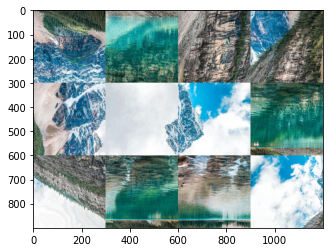

In [9]:
image = read_image("image_output.ppm")
#edges = filters.sobel(image)
#io.imshow(edges)
#io.show()
plt.imshow(image)
plt.savefig("image.png")